In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
import numpy as np

In [2]:
df = pd.read_csv("Data/PopulationByAgeSex.csv", index_col="Time", parse_dates=True)
print(df.shape)
df.head()

(66893, 70)


,Id,LocID,Location,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_5_9,PopFemale_5_9,PopTotal_5_9,PopMale_10_14,...,PopMale_95_99,PopFemale_95_99,PopTotal_95_99,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,YearDataCompleted
Time,,,,,,,,,,,,,,,,,,,,,
1950-01-01,1,4,Afghanistan,630.044,661.578,1291.622,516.206,487.335,1003.541,461.378,...,0.004,0.003,0.007,0.0,0.0,0.0,4099.243,3652.874,7752.117,1
1951-01-01,2,4,Afghanistan,641.199,673.293,1314.492,525.302,502.402,1027.704,465.611,...,0.007,0.005,0.012,0.0,0.0,0.0,4134.756,3705.395,7840.151,1
1952-01-01,3,4,Afghanistan,650.825,669.274,1320.099,533.097,521.672,1054.769,471.928,...,0.012,0.009,0.021,0.0,0.0,0.0,4174.450,3761.546,7935.996,1
1953-01-01,4,4,Afghanistan,659.896,663.606,1323.502,538.351,541.216,1079.567,480.448,...,0.015,0.013,0.028,0.0,0.0,0.0,4218.336,3821.348,8039.684,1
1954-01-01,5,4,Afghanistan,670.694,663.295,1333.989,540.820,557.196,1098.016,489.780,...,0.014,0.011,0.025,0.0,0.0,0.0,4266.484,3884.832,8151.316,1


In [3]:
# select Target and Features
#Targets
y = df['PopTotal']
y= y.values.reshape(-1,1)
print(f"{y} \n {y.shape}")

#Features
x = df.drop(['PopTotal', 'Location'], axis =1)
print(f"{x.head()} \n {x.shape}")

[[ 7752.117]
 [ 7840.151]
 [ 7935.996]
 ...
 [30959.811]
 [30964.052]
 [30965.421]] 
 (66893, 1)
            Id  LocID  PopMale_0_4  PopFemale_0_4  PopTotal_0_4  PopMale_5_9  \
Time                                                                           
1950-01-01   1      4      630.044        661.578      1291.622      516.206   
1951-01-01   2      4      641.199        673.293      1314.492      525.302   
1952-01-01   3      4      650.825        669.274      1320.099      533.097   
1953-01-01   4      4      659.896        663.606      1323.502      538.351   
1954-01-01   5      4      670.694        663.295      1333.989      540.820   

            PopFemale_5_9  PopTotal_5_9  PopMale_10_14  PopFemale_10_14  ...  \
Time                                                                     ...   
1950-01-01        487.335      1003.541        461.378          423.326  ...   
1951-01-01        502.402      1027.704        465.611          427.618  ...   
1952-01-01        521.

In [4]:
#reduct = PCA(n_components=50)
#x = reduct.fit_transform(x)
#x.shape

In [5]:
#preprocessing:
#encoder features
encoder_x = OrdinalEncoder()
encoder_x = encoder_x.fit_transform(x)
print(encoder_x)

[[0.0000e+00 0.0000e+00 2.0790e+04 ... 1.7997e+04 1.7173e+04 0.0000e+00]
 [1.0000e+00 0.0000e+00 2.0900e+04 ... 1.8085e+04 1.7276e+04 0.0000e+00]
 [2.0000e+00 0.0000e+00 2.1008e+04 ... 1.8179e+04 1.7372e+04 0.0000e+00]
 ...
 [6.6890e+04 1.6600e+02 2.3518e+04 ... 2.6797e+04 2.7079e+04 0.0000e+00]
 [6.6891e+04 1.6600e+02 2.3471e+04 ... 2.6795e+04 2.7080e+04 0.0000e+00]
 [6.6892e+04 1.6600e+02 2.3418e+04 ... 2.6791e+04 2.7083e+04 0.0000e+00]]


In [6]:
#encoder targets
encoder_y = OrdinalEncoder()
encoder_y= encoder_y.fit_transform(y)
print(encoder_y)

[[17634.]
 [17705.]
 [17788.]
 ...
 [26980.]
 [26981.]
 [26982.]]


In [7]:
#create a train set and test set
x_train, x_test, y_train, y_test = train_test_split(encoder_x, encoder_y, test_size=.2)
print(f'pour le train: {x_train.shape}, {y_train.shape}')
print(f'pour le test: {x_test.shape}, {y_test.shape}')

pour le train: (53514, 68), (53514, 1)
pour le test: (13379, 68), (13379, 1)


In [8]:
#modeling and normalisation
model = make_pipeline(StandardScaler(), SGDRegressor())
model.fit(x_train, y_train)

C:\Users\MOHAM\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [9]:
#Evaluate models
model.score(x_test, y_test)

0.9999924878467286

In [10]:
# voir la prediction du model
predict = model.predict(encoder_x[0:29])
targets = encoder_y[0:29]
print(f"prediction: {predict}, targets: {targets}")

prediction: [17668.98709693 17763.65356073 17852.65384686 17940.62558094
 18043.93551853 18135.24259003 18259.23802565 18402.3992813
 18531.03148346 18671.58767149 18821.62449932 19006.03076223
 19183.46340376 19344.43603616 19498.59735081 19663.26888685
 19831.58857097 20026.55047379 20197.27015059 20399.43848294
 20600.12216738 20774.94951106 20945.07609342 21121.99207722
 21268.57284597 21415.77824322 21534.2096379  21635.79703062
 21712.47304198], targets: [[17634.]
 [17705.]
 [17788.]
 [17877.]
 [17996.]
 [18101.]
 [18209.]
 [18349.]
 [18521.]
 [18671.]
 [18847.]
 [18989.]
 [19155.]
 [19330.]
 [19489.]
 [19677.]
 [19875.]
 [20093.]
 [20308.]
 [20517.]
 [20706.]
 [20869.]
 [21025.]
 [21189.]
 [21396.]
 [21534.]
 [21649.]
 [21737.]
 [21797.]]


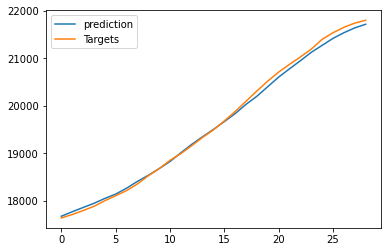

In [11]:
#graphic
plt.plot(predict, label="prediction")
plt.plot(targets, label="Targets")
plt.legend()
plt.show()